## Logistic Regression Agenda

  * Attempt to use linear regression for classification
  * Logistic regression is a better alternative for classification
  * Brief overview of probability, odds, e, log, and log-odds
  * What is the logistic regression model?
  * Interpreting logistic regression coefficients
  * Compare logistic regression with other models
  
By the end of this portion of the class you will be able to:
  * Use logistic regression for a classification problem in the future
  * interpret the coefficients of a trained logistic regression model

### Predicting a categorical response

In the first part of today's lesson, we were attempting to predict a **continuous response**. However, what we want to do now is see if we can apply the same sort of logic to predict an outcome that has only 2 distinct possibilities, or what is known as a **categorical response.**

In machine learning parlance, we looked at **regression** when we were using linear regression, but we are now going to try to use the same approach for what is known as a **classification** problem (problems with only a discrete, finite number of outcomes; in our case, just 2).

As always, we are going to import all of the functionality we need before we get started:

In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Now we are going to import a slightly different dataset. This dataset is also from the famed [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html) and can be found [here](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column).

This dataset contains 6 biomechanical features used to classify orthopaedic patients into 2 classes - normal and abnormal:
  * pelvic incidence
  * pelvic tilt
  * lumbar lordosis angle
  * sacral slope
  * pelvic radius
  * grade of spondylolisthesis
   
![Pelvic measurements](nbimages/pelvic_measurements.png)

![Grade of spondylolisthesis](nbimages/grades.png)
Lets load the data in:

In [4]:
# read in the data set, located in the same folder as notbook. assign column names
vertebral_data = pd.read_csv("vertebral_column_2_categories.dat", sep=" ",
                             names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle"\
                                    ,"sacral_slope","pelvic_radius","spondy_grade","outcome"])
# count the number of observations for each category of Outcome, which is the target variable
vertebral_data.outcome.value_counts()

AB    210
NO    100
Name: outcome, dtype: int64

In order to use linear regression for this task, we have to convert our **categorical** target into a number:

In [6]:
# Convert to integer
vertebral_data["outcome_number"] = (vertebral_data.outcome=='AB').astype(int)
# return and confirm that 1 is abnormal, 0 is normal
vertebral_data.outcome_number.value_counts()

1    210
0    100
Name: outcome_number, dtype: int64

Cool, so now our outcome is no longer a value, but a number. Let's plot `pelvic_incidence` relative to this new numeric `outcome_number`:

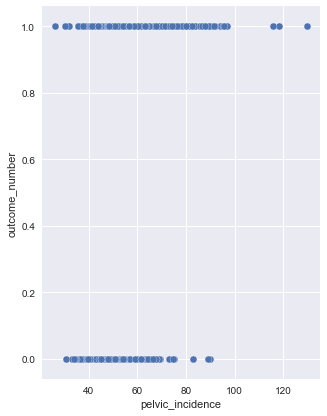

In [7]:
# visualize categorical data for one predictor
sns.pairplot(vertebral_data,x_vars=["pelvic_incidence"],y_vars="outcome_number", size=6, aspect=0.8)

And now lets do a simple linear regression on that feature like we did before:

In [8]:
# fit a linear regression model and store the predictions
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
# Instantiate and fit the Linear regression object
linreg = LinearRegression()
linreg.fit(X, y)
# predict outcomes
outcome_pred = linreg.predict(X)

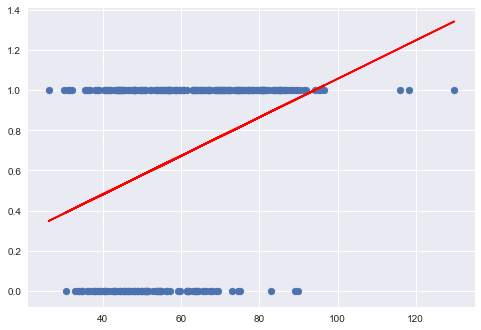

In [9]:
# scatter plot that includes the regression line
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred, color='red')

Lets examine the predictions:

In [11]:
outcome_pred[:10]

array([ 0.70173614,  0.47167114,  0.75740477,  0.76191585,  0.57389026,
        0.4830928 ,  0.60959496,  0.53223477,  0.51706986,  0.44892378])

Looking at the scatter plot above, if **pelvic_incidence=35**, what class do we predict for the outcome?     **0**

So, we predict the 0 class for **lower** values of `pelvic_incidence`, and the 1 class for **higher** values of `pelvic_incidence`. What's our cutoff value? Around **pelvic_incidence equals about 45 or 50**, because that's where the linear regression line crosses the midpoint (0.5) between predicting class 0 and class 1.

So, we'll say that if **outcome_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [11]:
outcome_pred

array([0.70173614, 0.47167114, 0.75740477, 0.76191585, 0.57389026,
       0.4830928 , 0.60959496, 0.53223477, 0.51706986, 0.44892378,
       0.57389026, 0.39651849, 0.56630781, 0.61093869, 0.64673938,
       0.52215682, 0.70941457, 0.39699839, 0.46821584, 0.4972979 ,
       0.51831761, 0.62389604, 0.70212006, 0.53386643, 0.44354888,
       0.61621761, 0.34776045, 0.51505427, 0.52436437, 0.73868859,
       0.58454408, 0.54202477, 0.52810761, 0.46783192, 0.66881487,
       0.398918  , 0.4047728 , 0.43942172, 0.63272624, 0.59990094,
       0.43740613, 0.54250467, 0.61362614, 0.73302575, 0.63454987,
       0.5854079 , 0.56064496, 0.49365065, 0.48606819, 0.49768182,
       0.62744732, 0.81115379, 0.57868928, 0.3861526 , 0.491923  ,
       0.55421428, 0.51284673, 0.54653584, 0.51140702, 0.55853339,
       0.81067389, 0.9575239 , 0.52417241, 0.8424434 , 0.82766242,
       0.90233517, 0.85012183, 0.8228634 , 0.7885984 , 0.65921683,
       0.79320546, 0.93084135, 0.91231713, 0.62955889, 0.78994

In [12]:
# transform predictions to 1 or 0
outcome_pred_class = np.where(outcome_pred >= 0.5, 1, 0)
outcome_pred_class

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

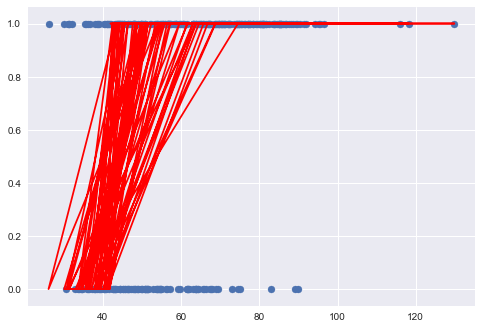

In [13]:
# plot the class predictions
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred_class, color='red')

What went wrong? This is a line plot, and it connects points in the order they are found. Let's sort the DataFrame to fix this:

In [14]:
# add predicted class to DataFrame
vertebral_data['outcome_pred_class'] = outcome_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
vertebral_data.sort_values('pelvic_incidence', inplace=True)

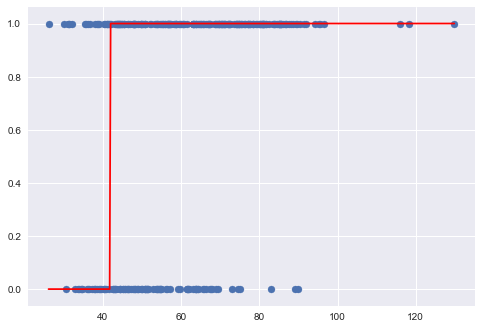

In [15]:
# plot the class predictions again
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, vertebral_data.outcome_pred_class, color='red')

### Use Logistic Regression Instead of Linear Regression on Categorical Outcome Variables

Logistic regression can do exactly what we just did:

In [26]:
from sklearn.linear_model import LogisticRegression

# create logistic regression object
logreg = LogisticRegression(C=1e9)
# create X and y
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
#fit the model
logreg.fit(X, y)
# create predictions
outcome_pred_class_log = logreg.predict(X)

In [27]:
# print the class predictions
outcome_pred_class_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

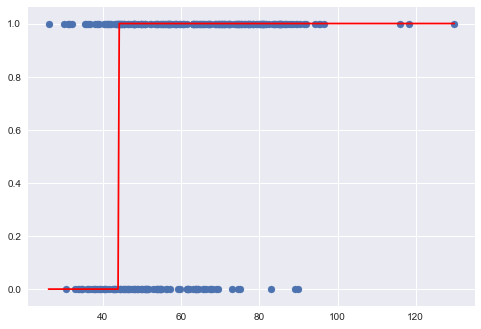

In [25]:
# plot the class predictions
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred_class_log, color='red')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [19]:
# store the predicted probabilites of both classes
outcome_probs = logreg.predict_proba(X)
outcome_probs

array([[0.7223927 , 0.2776073 ],
       [0.67727872, 0.32272128],
       [0.67030645, 0.32969355],
       [0.66445824, 0.33554176],
       [0.6638586 , 0.3361414 ],
       [0.66145477, 0.33854523],
       [0.65407185, 0.34592815],
       [0.6424256 , 0.3575744 ],
       [0.63311007, 0.36688993],
       [0.6324854 , 0.3675146 ],
       [0.6257109 , 0.3742891 ],
       [0.6223049 , 0.3776951 ],
       [0.62091378, 0.37908622],
       [0.6116323 , 0.3883677 ],
       [0.60894689, 0.39105311],
       [0.60663984, 0.39336016],
       [0.60342772, 0.39657228],
       [0.60304165, 0.39695835],
       [0.59969046, 0.40030954],
       [0.59620048, 0.40379952],
       [0.59036232, 0.40963768],
       [0.58266932, 0.41733068],
       [0.58044503, 0.41955497],
       [0.5784797 , 0.4215203 ],
       [0.5774305 , 0.4225695 ],
       [0.57243742, 0.42756258],
       [0.57046234, 0.42953766],
       [0.56993527, 0.43006473],
       [0.56518464, 0.43481536],
       [0.5647882 , 0.4352118 ],
       [0.

In [20]:
# store the predicted probabilites of class 1 only
outcome_probs = logreg.predict_proba(X)[:, 1]
outcome_probs

array([0.2776073 , 0.32272128, 0.32969355, 0.33554176, 0.3361414 ,
       0.33854523, 0.34592815, 0.3575744 , 0.36688993, 0.3675146 ,
       0.3742891 , 0.3776951 , 0.37908622, 0.3883677 , 0.39105311,
       0.39336016, 0.39657228, 0.39695835, 0.40030954, 0.40379952,
       0.40963768, 0.41733068, 0.41955497, 0.4215203 , 0.4225695 ,
       0.42756258, 0.42953766, 0.43006473, 0.43481536, 0.4352118 ,
       0.43878343, 0.44275934, 0.45059959, 0.45193099, 0.45273016,
       0.45472915, 0.4563294 , 0.45726329, 0.46287274, 0.46314011,
       0.46527976, 0.46929499, 0.47036641, 0.47090223, 0.47425254,
       0.48095981, 0.48095981, 0.4863307 , 0.4890174 , 0.4899579 ,
       0.49009227, 0.49210788, 0.49331738, 0.49519897, 0.4970807 ,
       0.4980216 , 0.49976901, 0.50380145, 0.50420468, 0.50514551,
       0.50568312, 0.5066239 , 0.50743024, 0.50796778, 0.50823655,
       0.51307333, 0.5134763 , 0.51535657, 0.51763917, 0.51924998,
       0.52018944, 0.52153127, 0.52206792, 0.52367755, 0.53091

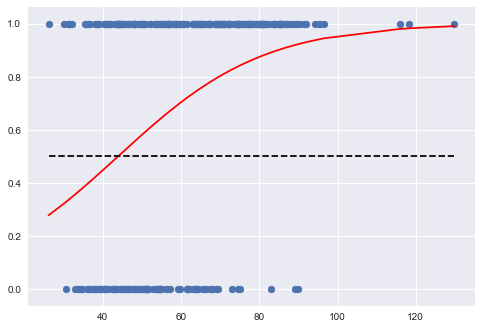

In [28]:
# plot the predicted probabilities, and the 50% line
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red')
plt.plot(vertebral_data.pelvic_incidence,np.ones(outcome_probs.shape)*.5,'k--')

In [29]:
# examine some example predictions
print("Pelvic incidence of 15:", logreg.predict_proba(15))

Pelvic incidence of 15: [[0.82575878 0.17424122]]


In [30]:
print("Pelvic incidence of 25:", logreg.predict_proba(25))

Pelvic incidence of 25: [[0.73462052 0.26537948]]


In [31]:
print("Pelvic incidence of 50:", logreg.predict_proba(50))

Pelvic incidence of 50: [[0.4192194 0.5807806]]


What are these numbers? 

The first number in each entry indicates the predicted probability of **class 0**, and the second number in each entry indicates the predicted probability of **class 1**.

### Review: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [32]:
# create a table of probability versus odds
prob_table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]})
prob_table['odds'] = prob_table.probability/(1 - prob_table.probability)
prob_table

,probability,odds
0,0.100,0.111111
1,0.200,0.250000
2,0.250,0.333333
3,0.300,0.428571
4,0.400,0.666667
5,0.500,1.000000
6,0.600,1.500000
7,0.700,2.333333
8,0.800,4.000000
9,0.900,9.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [33]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth ([wiki](https://en.wikipedia.org/wiki/Natural_logarithm)):

In [34]:
# time needed to grow 1 unit to 2.718 units
np.log(np.exp(1))

1.0

It is also the **inverse** of the exponential function ([review your properties of logarithms here](http://www.purplemath.com/modules/logrules.htm)):

In [35]:
np.log(np.exp(5))

5.0

In [36]:
# add log-odds to the table
prob_table['log_odds'] = np.log(prob_table.odds)
prob_table

,probability,odds,log_odds
0,0.100,0.111111,-2.197225
1,0.200,0.250000,-1.386294
2,0.250,0.333333,-1.098612
3,0.300,0.428571,-0.847298
4,0.400,0.666667,-0.405465
5,0.500,1.000000,0.000000
6,0.600,1.500000,0.405465
7,0.700,2.333333,0.847298
8,0.800,4.000000,1.386294
9,0.900,9.000000,2.197225


### Ok, but what is logistic regression?

[**Linear regression:**](https://en.wikipedia.org/wiki/Linear_regression) continuous response is modeled as a linear combination of the features used :

$$y = \beta_0 + \beta_1x + ... \beta_nx$$

[**Logistic regression:**](https://en.wikipedia.org/wiki/Logistic_regression) log-odds of a categorical response being "true" (or the number 1) is modeled as a linear combination of the features. This is called the [**logit function**](https://en.wikipedia.org/wiki/Logit):

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x + ... \beta_nx$$

The equation can be rearranged into the [**logistic function**](https://en.wikipedia.org/wiki/Logistic_function):

$$p = \frac{e^{\beta_0 + \beta_1x + ... + \beta_nx}} {1 + e^{\beta_0 + \beta_1x + ... + \beta_nx}}$$

Here's what that looks like:

![logistic curve](images/logistic_curve.png)

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**:

$f(x)= 
\begin{cases}
    1,& \text{if } p\geq 0.5\\
    0,              & \text{otherwise}
\end{cases}$

The **logistic function** has some nice properties:

- Takes on an "s" shape (which allows it to be differentiable, a really important math property for functions to have)
- Output is bounded by 0 and 1

Some things to note:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data. We do this using fancy math involving taking derivatives, and thats why that S-shaped curve is so important.

### Interpreting Logistic Regression Coefficients

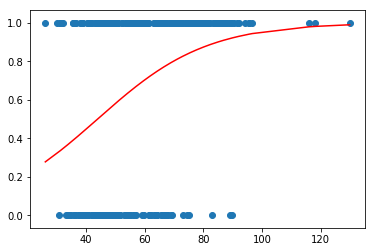

In [37]:
# plot the predicted probabilities again
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red')

In [32]:
# compute predicted log-odds for pelvic_incidence=55 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 55
print("Log odds:",logodds)

Log odds: [0.59481302]


In [33]:
# convert log-odds to odds
odds = np.exp(logodds)
print("odds:",odds)

odds: [1.81269197]


In [35]:
# convert odds to probability, this is the number you would see in the plot above where x= 55
prob = odds/(1 + odds)
print("probability:",prob)

probability: [0.64446871]


In [41]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(55)[:, 1]

array([ 0.64446871])

In [36]:
# examine the coefficient for al
feature_cols, logreg.coef_[0]

(['pelvic_incidence'], array([0.05376688]))

**Interpretation:** A 1 unit increase in `pelvic_incidence` is associated with a ~0.054 unit increase in the log-odds of `outcome`, where a positive outcome is having a vertebral abnormality (not positive in the real world, but positive in how we coded our outcome feature).

In [37]:
# increasing pelvic_incidence by 1 (so that pelvic_incidence=56) increases the log-odds by about 0.054
logodds = 0.59481302 + 0.053766875792266015
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.6566903741190347

In [38]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(56)[:, 1]

array([0.65669037])

**Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).**

In [45]:
# examine the intercept
logreg.intercept_

array([-2.36236515])

**Interpretation:** For a 'pelvic_incidence' value of 0, the log-odds of 'outcome' is -2.36.

In [46]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.08608793])

That makes sense from the plot above, because the probability of outcome=1 should be very low for such a low `pelvic_incidence` value.

![logistic betas example](nbimages/logisticbetas.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

The non-bias $\beta$ coefficients are effectively estimates of how certain you are of the outcome given how much evidence that specific feature gives you. A really high magnitude (positive or negative) value means you are very certain of the outcome, given you know that feature's value.

### How do we measure model performance for classification problems?

Now that we have a trained model just as we did before with linear regression, what is our **evaluation metric/loss function**?

There are a few metrics we could use. For this class, we are going to stick with the accuracy metric, getting into more metrics in later lessons.
  
#### Accuracy
- Will result in a ratio between 0 and 1
<img src="images/accuracy.png" width="400px;"/>

Let's compute our classification accuracy after training on the whole dataset, using our just-trained one-feature model and the scikit-learn method `accuracy_score`:

In [43]:
y = vertebral_data.outcome_number
y_pred = outcome_pred_class
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

Model accuracy: 0.6258064516129033


62% is ok, but its not really fantastic. Can we do better? (YES WE CAN!)

#### Exercise Time!!
  * Generate the logistic regression model incorporating all of the features we have available to predict `outcome_number` and get the accuracy when training and testing on all data. How much better is this than the case where we trained our model using only `pelvic_incidence`?
  * Use train/test split with 70% training, 30% testing and get the test error of the model trained on all features using `train_test_split` like we did during linear regression 
  * Inspect all of the model coefficients of the model trained on all features. Which feature is the most important for the prediction? Which is the least important?
  * What are some problems you can see in using the data like we have been? (Look at the fraction of positive and negative outcomes in the dataset)

In [45]:
y = vertebral_data['outcome_number']
X = vertebral_data.drop(['outcome','outcome_pred_class', 'outcome_number'], axis=1)

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3 )


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
X.head(2)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondy_grade
26,26.15,10.76,14.0,15.39,125.20,-10.09
53,30.15,11.92,34.0,18.23,112.68,11.46


In [48]:
logreg.coef_

array([[ 0.01883671,  0.09230202, -0.00710426, -0.05182301, -0.02188669,
         0.14438494]])

In [49]:
outcome_predictions = logreg.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, outcome_predictions))

Accuracy:  0.8494623655913979


### Comparing Logistic Regression with Other Models

Logistic regression has some really awesome advantages:

  * It is a highly interpretable method (if you remember what the conversions from log-odds to probability are)
  * Model training and prediction are fast
  * No tuning is required (excluding regularization, which we will talk about later)
  * No need to scale features
  * Outputs well-calibrated predicted probabilities (the probabilities behave like probabilities)

However, logistic regression also has some disadvantages:

  * It presumes a linear relationship between the features and the log-odds of the response
  * Compared to other, more fancypants modeling approaches, performance is (generally) not competitive with the best supervised learning methods
  * Like linear regression for regression, it is sensitive to irrelevant features
  * Unless you explicitly code them (we will see how to do that later), logistic regression can't automatically learn feature interactions